Calibration of Instruments
===

## HFIR

> This section covers the calibration for HFIR powder diffraction instruments, including HB-2A and HB-2C.This section covers the calibration for HFIR powder diffraction instruments, including HB-2A and HB-2C.

### Howto

> A side note would be that for constant wavelength (CW) instruments, the calibration can be vaguely considered as part of the data analysis step. The reason is that in terms of technical barrier, it is relatively easier for general users or instrument scientists to grab the diffraction data for those standard samples, load them into a Ritveld program and perform the calibration, by releasing those calibration relevant parameters (e.g., zero offset). This is in contrast to the calibration for time-of-flight (TOF) instruments, as to be discussed in details in the section below.

For both HB-2A and HB-2C, they are running the constant wavelength mode, and specifically they have the monochromator wavelength as follows,

- HB-2A: 1.54 Å, 2.41 Å, 1.12 Å (Information can be found [https://neutrons.ornl.gov/powder](https://neutrons.ornl.gov/powder))

- HB-2C: 1.5 Å, 0.95 Å (Information can be found at [https://neutrons.ornl.gov/wand](https://neutrons.ornl.gov/wand))

Both instruments then use standard sample to perform the calibration in Rietveld programs (Fullprof, GSAS, and GSAS-II) to generate the instrument parameter, which not only contains the calibration constant but also hosts the instrument peak profile information. Specifically,

- HB-2A has been using multiple standard samples as the calibrants, namely Si, Lab6, and NAC (Na2Al2Ca3F14). The instrument parameter files suitable for multiple Rietveld programs for those various calibrants can be found at [https://neutrons.ornl.gov/powder/users](https://neutrons.ornl.gov/powder/users).

- HB-2C has been using Si as the calibrant, and also the instrument parameter files for various Rietveld programs are provided, as can be found at [https://neutrons.ornl.gov/wand/users](https://neutrons.ornl.gov/wand/users).

### Usage

On the user side, it is expected that the instrument parameter files should be delivered to them together with the user data so that they can import those instrument parameter file in relevatnt Rietveld programs to conduct the refinement. At this point, specifically for CW data, the main wavelength (corresponding to the monochromator used during the experiment) should be read in from the instrument parameter file, leaving the zero offset refinable.

## SNS

> This section covers the calibration for SNS powder diffraction instruments, including NOMAD and POWGEN.This section covers the calibration for SNS powder diffraction instruments, including NOMAD and POWGEN.

### Howto

> Compared to constant wavelength (CW) instruments, the calibration for time-of-flight (TOF) instruments is a bit more complicated. The main reason is that both NOMAD and POWGEN are not only generating Bragg diffraction data but also at the same time they would be used to produce the total scattering data (the Fourier transform of which would yield the pair distribution function (PDF) for probing the local structure of materials). The comlexity in terms of calibration then comes on the total scattering side, as detailed below.

The calibration for NOMAD and POWGEN can be roughly separated into two scenarios -- one for the generation of total scattering data and the other for the Bragg diffraction pattern. For the Bragg part, the mechanism of calibration is similar to that for CW instruments, in terms of technical operation. First, a standard sample (Si, Lab6, or NAC) needs to be measured and the corresponding Bragg pattern would be loaded into Rietveld program where the calibration parameters would be released for being refined, including the DIFC, DIFA, TZERO parameters (specifically for POWGEN, one also has an extra DIFB parameter). The refined calibration constants for various banks (on NOMAD, usuaslly the physical banks would be used to group the spectra from the individual detectors whereas for POWGEN, usually there is only one bank) would then be written into the instrument parameter file along with those instrument peak profile parameters.

On the total scattering side, the calibration is more of a part of the data reduction process since it is a prerequisite to produce the total scattering in $Q$-space (followed by the Fourier transform to produce the PDF). The principle of calibration stays the same -- a standard sample would be measured and the TOF-to-$d$ transformation relation would be constructed against those known peak positions in $d$-space. Usually, a diamond sample would be used for such a calibration purpose on both NOMAD and POWGEN, since the sharp and strong diamond diffraction peaks makes it easy to perform the peak fitting for extracting the peak position accurately. In practice, a generic routine has been designed to routinely calibrate the instrument, by performing sequentially an automatic grouping of pixels (using an unsupervised clustering algorithm), cross correlation, and the actual calibration steps. The automatic grouping step can be summarized as below,

<img src="../imgs/calib_grouping.png" alt="drawing" width="1200"/>

where the scattering patterns from all detectors would be clustered into different groups so that each group contains patterns as similar to each other as possible. This is to make the following cross correlation step (to align peaks) more reliable. The cross correlation step can be illustrated using the following diagram,

<img src="../imgs/calib_cc.png" alt="drawing" width="1200"/>

The final stage of the generic calibration routine is to bring the peak position of the focused pattern (for each of the identified group in previous stage where peaks have been lined up via cross correlation across patterns in the group) to its nominal position. This step involves the peak fitting (multiple peaks could be used) to extract the peak position in TOF-space, and then by comparing to the nominal peak positions of the standard sample, the TOF-to-$d$ transformation relation could be established using a single DIFC parameter.

> The requirement for a single DIFC parameter is hardwired into such a generic calibration routine and the fundamental reason resides in the need to transform the offset at the stage of cross correlation to effective calibration constants (which then would be combined with the calibration constants from other stages to give the final effective calibration constant).

As a showcase, the following picture is showing the result of applying such a generic calibration routine on NOMAD (left -- alignment of pixels using the engineering values, i.e., $L_1$, $L_2$ and scattering angle, right -- alignment after calibration),

<img src="../imgs/calib_final.png" alt="drawing" width="1200"/>

As a quantitative diagnostic, the following figure is showing the so-called **relative strain** ($rel\ strain = d_{observed} / d_{nominal}$) for all the diamond peaks (see the symbols of different color in the legend) involved in the calibration process,

<img src="../imgs/calib_diag.png" alt="drawing" width="1200"/>

### Calibration - Some Notes

1. The current calibration routine is **ONLY** for establishing the TOF-to-$d$ transformation, i.e., the actual engineering value is still not calibrated. Specifically, one can refer to the following equations,

    $\lambda = \frac{h}{p} = \frac{h}{m\frac{L_{tot}}{TOF}}$

    $2d\,sin\theta = \lambda = \frac{h}{m\frac{L_{tot}}{TOF}} \Rightarrow DIFC = \frac{TOF}{d} = \frac{2mL_{tot}sin\theta}{h}$
    
    where it can be clearly seen that knowing the DIFC value is not enough to disentangle $L_{tot}$ (the total flying path) and $\theta$ (the scattering angle).

2. There is one potential issue with the current calibration routine. When the sample position is not identical to that of the calibrant, the calibration constant obtained via calibrating against the calibrant would not be applicable to the sample since, according to the equations above, the change of the flying path and scattering angle would invalidate the established TOF-to-$d$ transformation that was constructed for the calibrant (and only for the calibrant in such a situation). As such, some extra efforts are needed to account for the potential sample position shift as compared to the calibrant. One dirty method is to learn from the Bragg calibration routine. In a normal Bragg calibration setup, additional calibration parameters such as DIFA and TZERO are introduced to account for the potential sample position shift. With this regard, a GUI program called `sofq_calib` (see the demo video attached below) with wxPython framework has been developed to further calibrate the total scattering pattern against the Bragg refinement result. Through this further calibration step, a common TOF-$d$ transformation is shared between the total scattering and Bragg data. The GUI was released as a conda package and could be installed conveniently via conda. Detailed instructions about the installation together with documentation of usage could be found at [https://rmc-adv-tools.readthedocs.io/en/main/rmc_tools/sofq_calib.html](https://rmc-adv-tools.readthedocs.io/en/main/rmc_tools/sofq_calib.html). In the future, we plan to develop a machine learning algorithm to post-calibrate the instrument according to the relative peak shift across individual detectors. Through such a process, it is expected that one can deduce the sample shift as compared to the calibrant so that the total scattering data of the sample can be calibrated more accurately. There is still some ongoing discussion about this.

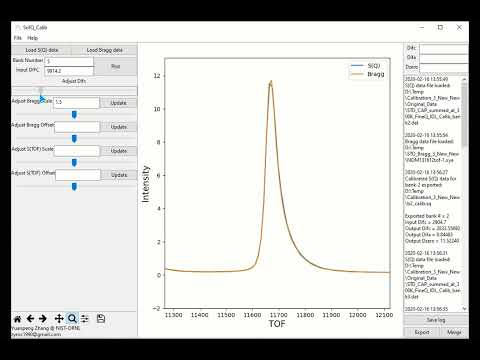

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('D8mY7k8MAIk', width=720, height=500)

### Usage

The usage of the calibration for powder TOF instruments (specifically, NOMAD and POWGEN in current scope) is two-fold, in line with the discussion presented in the sub-section above. On the Bragg side, the scenario is quite similar to that for CW instruments, i.e., the instrument parameter file containing the calibration constants will be delivered to genernal users. At the stage of data analysis, the main DIFC constant should be fixed and in most cases, the DIFA and TZERO values (and, potentially the DIFB parameter for POWGEN) can be released to be refined, to account for the potential sample position shift, etc.

On the total scattering side, although, as discussed in previous sub-section, the exact flying path, scattering angle, and among other engineering parameters (e.g., detector location) are still unknown after the calibration process, total scattering pattern with correct $Q$ (or $d$) assignment can still be constructed. However, as discussed in previous sub-section, the prerequisite condition for an accurate $Q$ or $d$ assignment is that the potential sample position shift as compared to the calibrant could be accounted properly.